<a href="https://colab.research.google.com/github/khushi2068/Clustering/blob/main/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering-Assignment

In [13]:
!pip install ucimlrepo &> null
print("Installed ucimlrepo")
!pip install pycaret &>null
print("Installed pycaret")

Installed ucimlrepo
Installed pycaret


## Importing Dataset

In [36]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
features= heart_failure_clinical_records.data.features
targets = heart_failure_clinical_records.data.targets

# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)


{'uci_id': 519, 'name': 'Heart failure clinical records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'title': 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejec

In [40]:
from pycaret.clustering import setup, create_model, plot_model
import pandas as pd

In [42]:
clustering_setup = setup(data=features, verbose=False)
selected_model_names = clustering_setup.models().index[[0, 3, 4]]

In [43]:
selected_model_names

Index(['kmeans', 'sc', 'hclust'], dtype='object', name='ID')

In [49]:
m=create_model("kmeans")

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1063,27.5313,2.3742,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

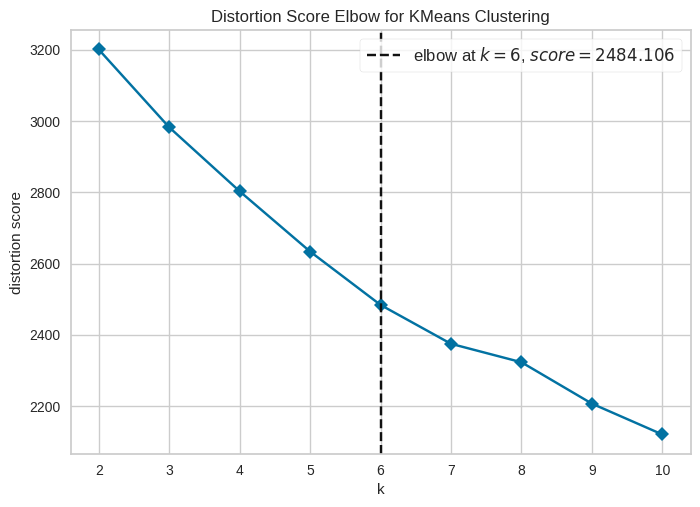

In [50]:
plot_model(m,'elbow')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1051,23.1853,2.1811,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

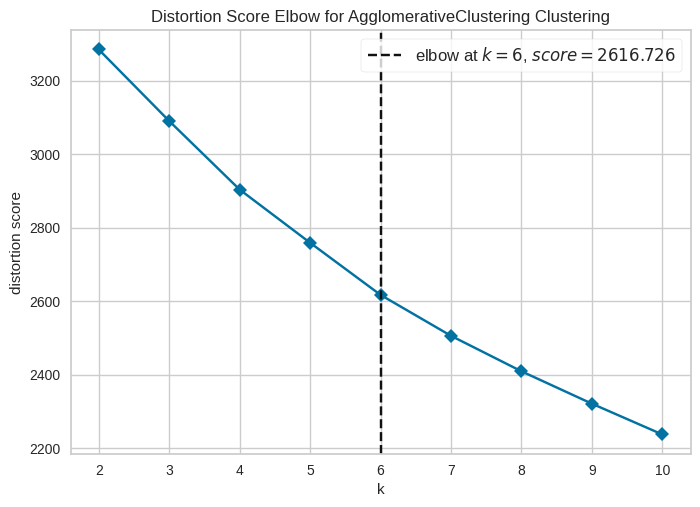

In [51]:
h=create_model("hclust")
plot_model(h,'elbow')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1051,23.1853,2.1811,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

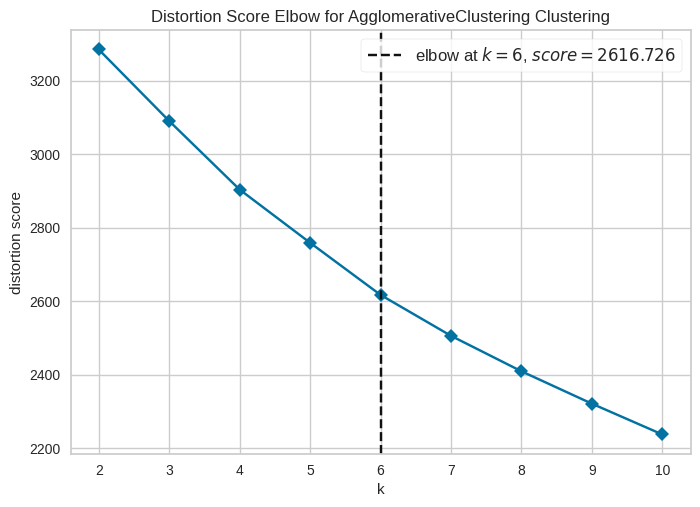

In [52]:
s=create_model("hclust")
plot_model(s,'elbow')

In [44]:
preprocessing_configs = {
    'No Preprocessing': {"remove_outliers": False, 'transformation': False, "normalize": False, 'pca': False},
    'Transformation': {"remove_outliers": False, 'transformation': True, "normalize": False, 'pca': False},
    'Normalization': {"remove_outliers": False, 'transformation': False, "normalize": True, 'pca': False},
    'PCA': {"remove_outliers": False, 'transformation': False, "normalize": False, 'pca': True},
    'Norm + PCA': {"remove_outliers": False, 'transformation': False, "normalize": True, 'pca': True},
    'Norm + PCA + TRANS': {"remove_outliers": False, 'transformation': True, "normalize": True, 'pca': True},
}

In [ ]:
for model_name in selected_model_names:
    comparison_results = pd.DataFrame()
    for cluster_size in range(3, 7):
        for config_name, config_params in preprocessing_configs.items():
            current_setup = setup(data=features, verbose=False, **config_params)
            current_model = create_model(model_name, num_clusters=cluster_size, verbose=False)
            current_results = current_setup.pull()
            current_results['Configuration'] = config_name
            current_results['Cluster Size'] = cluster_size
            comparison_results = pd.concat([comparison_results, pd.DataFrame(current_results)], ignore_index=True)

    comparison_results.set_index(['Configuration', 'Cluster Size'], inplace=True)
    sorted_results = comparison_results.sort_index().T
    sorted_results.iloc[:3, :].to_csv(f'{model_name}.csv')
    print("    "+ model_name)
    display(sorted_results.iloc[:3, :])

    kmeans


Configuration     No Preprocessing                               Norm + PCA  \
Cluster Size                     3         4         5         6          3   
Silhouette                  0.5424    0.5545    0.5384    0.5542     0.1017   
Calinski-Harabasz         391.0877  499.4446  602.3528  757.9344    29.7602   
Davies-Bouldin              0.5710    0.5698    0.5070    0.4728     2.7016   

Configuration                                Norm + PCA + TRANS           ...  \
Cluster Size             4        5        6                  3        4  ...   
Silhouette          0.1015   0.0966   0.1052             0.0996   0.0996  ...   
Calinski-Harabasz  27.5328  25.4835  24.6493            30.9934  28.6961  ...   
Davies-Bouldin      2.4008   2.3118   2.0954             2.6563   2.4250  ...   

Configuration     Normalization                PCA                      \
Cluster Size                  5        6         3         4         5   
Silhouette               0.0997   0.1035    0.5481    0.5532    0.5339   
Calinski-Harabasz       25.1604  25.8520  390.9995  499.8170  602.9443   
Davies-Bouldin           2.3109   2.0545    0.5652    0.5760    0.5062   

Configuration               Transformation                                
Cluster Size              6              3         4         5         6  
Silhouette           0.5540         0.5553    0.5686    0.6053    0.6152  
Calinski-Harabasz  758.1672       476.7125  630.9197  816.6691  912.4612  
Davies-Bouldin       0.4727         0.5659    0.5524    0.4887    0.4765  

[3 rows x 24 columns]